<a href="https://colab.research.google.com/github/Yangdoubleh/ML-DL-TIL/blob/master/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(train_input, train_target)
print(kn.predict([[50]]))

[1033.33333333]


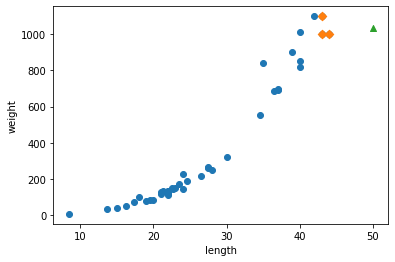

In [31]:
distances, indexes = kn.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
#3개 근접한 평균값을 내기 때문에 값에 오차가 생김
print(np.mean(train_target[indexes]))

1033.3333333333333


In [33]:
#크기가 100이여도 이웃 평균이라서 50과 같은 결과가 나온다.
print(kn.predict([[100]]))

[1033.33333333]


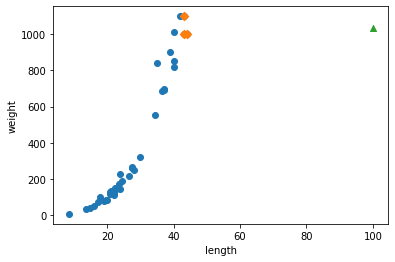

In [34]:
distances, indexes = kn.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1210.59261069]


In [36]:
#ax+b 형식, 기울기와 절편값 확인
print(lr.coef_, lr.intercept_)
lr.coef_=lr.coef_.reshape(-1)
lr.intercept_=lr.intercept_.reshape(-1)

[36.87382298] -633.0985384392886


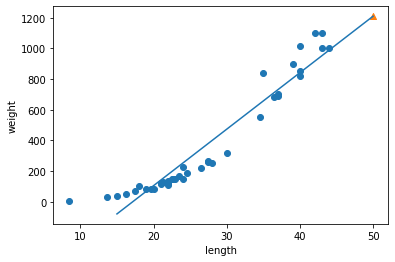

In [39]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) #x값이 15부터 50 까지 선형 방정식 그리기
plt.scatter(50, 1210, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9151455144814088
0.9235443459061629


In [41]:
#polynomial regression
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [42]:
lr = LinearRegression()
lr.fit (train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1592.20444661]


In [43]:
print(lr.coef_, lr.intercept_)

[  1.04509354 -23.17882026] 138.41160742194455


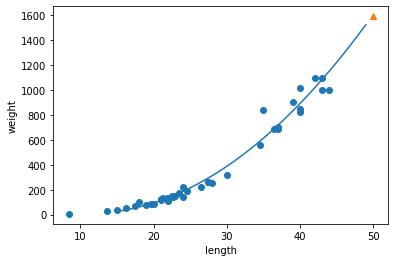

In [44]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.05*point**2 - 23.2*point + 138.41)
plt.scatter(50, 1592, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [45]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9740348312935536
0.9625716589368356
